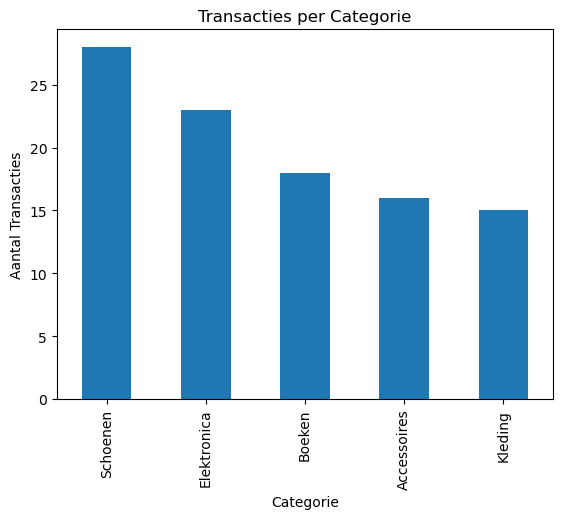

count    100.00000
mean     556.16690
std      188.69417
min      198.83000
25%      421.76500
50%      552.40000
75%      682.69000
max      941.09000
Name: Prijs, dtype: float64


In [5]:
import pandas as pd
from faker import Faker
import random
import numpy as np
import matplotlib.pyplot as plt

# Maak een instantie van de Faker-klasse
fake = Faker()

# Functie om nepgegevens voor klanten te genereren
def generate_klanten(aantal_klanten):
    klanten = []

    for klant_id in range(1, aantal_klanten + 1):
        naam = fake.name()
        email = fake.email()
        locatie = fake.city() + ", " + fake.state()
        klanten.append([klant_id, naam, email, locatie])

    klanten_df = pd.DataFrame(klanten, columns=["Klant_ID", "Naam", "E-mailadres", "Locatie"])

    return klanten_df

# Functie om nepgegevens voor producten te genereren
def generate_producten(aantal_producten, categorieën):
    productenlijst = []

    for _ in range(aantal_producten):
        categorie = random.choice(categorieën)
        if categorie == "Elektronica":
            productnaam = random.choice(["Laptop", "Smartphone", "Tablet", "Koptelefoon", "Muis", "Toetsenbord"])
        elif categorie == "Kleding":
            productnaam = random.choice(["T-shirt", "Jeans", "Jurk", "Sweater", "Schoenen", "Riem"])
        elif categorie == "Schoenen":
            productnaam = random.choice(["Sportschoenen", "Laarzen", "Sandalen", "Slippers"])
        elif categorie == "Accessoires":
            productnaam = random.choice(["Horloge", "Zonnebril", "Tas", "Hoed"])
        elif categorie == "Boeken":
            productnaam = random.choice(["Roman", "Non-fictie", "Thriller", "Fantasy"])

        prijs = round(max(10, np.random.normal(loc=500, scale=200)), 2)
        voorraadniveau = random.randint(0, 100)
        productenlijst.append([productnaam, categorie, prijs, voorraadniveau])

    producten_df = pd.DataFrame(productenlijst, columns=["Productnaam", "Categorie", "Prijs", "Voorraadniveau"])

    return producten_df

# Functie om nepgegevens voor transacties te genereren
def generate_transacties(aantal_transacties, klanten, producten):
    transacties = []

    for _ in range(aantal_transacties):
        klant_id = random.choice(klanten['Klant_ID'])
        product = random.choice(producten['Productnaam'])
        categorie = producten.loc[producten['Productnaam'] == product]['Categorie'].values[0]
        prijs = producten.loc[producten['Productnaam'] == product]['Prijs'].values[0]
        prijs = round(max(10, np.random.normal(loc=prijs, scale=20)), 2)
        datum = fake.date_time_between(start_date='-1y', end_date='now')
        transacties.append([klant_id, product, categorie, prijs, datum])

    transacties_df = pd.DataFrame(transacties, columns=["Klant_ID", "Product", "Categorie", "Prijs", "Datum/Tijd"])
    transacties_df['Datum/Tijd'] = pd.to_datetime(transacties_df['Datum/Tijd'])

    return transacties_df


# Functie om gegevens te visualiseren
def plot_data(data, x_label, y_label, title):
    data.plot(kind='bar', x=x_label, y=y_label)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

# Functie om gegevens te analyseren
def analyze_data(data):
    summary_stats = data.describe()
    return summary_stats

# Functie om gegevens te valideren en op te schonen
def validate_and_clean_data(data):
    cleaned_data = data.drop_duplicates()
    return cleaned_data

def save_data(data, bestandsnaam):
    data.to_csv(bestandsnaam, index=False)

# Parameters
aantal_transacties = 100
aantal_klanten = 50
aantal_producten = 20

categorieën = ["Elektronica", "Kleding", "Schoenen", "Accessoires", "Boeken"]

# Genereer klantgegevens
klanten_df = generate_klanten(aantal_klanten)

# Genereer productgegevens
producten_df = generate_producten(aantal_producten, categorieën)

# Genereer transactiegegevens
transacties_df = generate_transacties(aantal_transacties, klanten_df, producten_df)

# Visualiseer gegevens (voorbeeld: transacties per categorie)
plot_data(transacties_df['Categorie'].value_counts(), "Categorie", "Aantal Transacties", "Transacties per Categorie")

# Analyseer gegevens (voorbeeld: statistieken van prijzen)
summary_stats = analyze_data(transacties_df['Prijs'])
print(summary_stats)

# Valideer en reinig gegevens
cleaned_transacties_df = validate_and_clean_data(transacties_df)

# Opslaan van gegevens
save_data(cleaned_transacties_df, "transacties_data.csv")
save_data(klanten_df, "klanten_data.csv")
save_data(producten_df, "producten_data.csv")
